# Efeito magnético de formas simples: esfera e prisma

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import prism_mag

In [3]:
import sphere_mag

## Gerando os parâmetros das coordenadas

In [4]:
Nx = 100
Ny = 50
ymin = -2000.
ymax = 2000.
xmin = -2000.
xmax = 2000.
area = [xmin,xmax,ymin,ymax]
shape = (Nx,Ny)

In [5]:
dx = (xmax - xmin)/(Nx-1)
dy = (ymax - ymin)/(Ny-1)

In [6]:
x = np.linspace(area[0],area[1],num=Nx)
y = np.linspace(area[2],area[3],num=Ny) 
yc,xc = np.meshgrid(y,x)

In [7]:
voo = -100.
zc = voo*np.ones_like(xc)

In [8]:
coordinates = np.array([yc.ravel(),xc.ravel(),zc.ravel()])

## Efeito magnético de uma esfera

### Gerando os parâmetros da esfera

In [9]:
intensidades = np.array([10.])

In [10]:
I,D = 20.,20.
direcoes = np.array([[I,D]])

In [11]:
modelo = np.array([[0.,0.,-450.,100.]])

### Calculando as componentes do campo

In [12]:
bz = sphere_mag.magnetics(coordinates,modelo,intensidades,direcoes,field="b_z").reshape(shape)

In [13]:
bx = sphere_mag.magnetics(coordinates,modelo,intensidades,direcoes,field="b_x").reshape(shape)

In [14]:
by = sphere_mag.magnetics(coordinates,modelo,intensidades,direcoes,field="b_y").reshape(shape)

### Anomalia de Campo total aproximada

In [15]:
I0,D0 = 40.,30.
j0x = np.cos(np.deg2rad(I0))*np.cos(np.deg2rad(D0))
j0y = np.cos(np.deg2rad(I0))*np.sin(np.deg2rad(D0))
j0z = np.sin(np.deg2rad(I0))
tfa_sph = j0x*bx + j0y*by + j0z*bz

### Visualização dos dados calculados

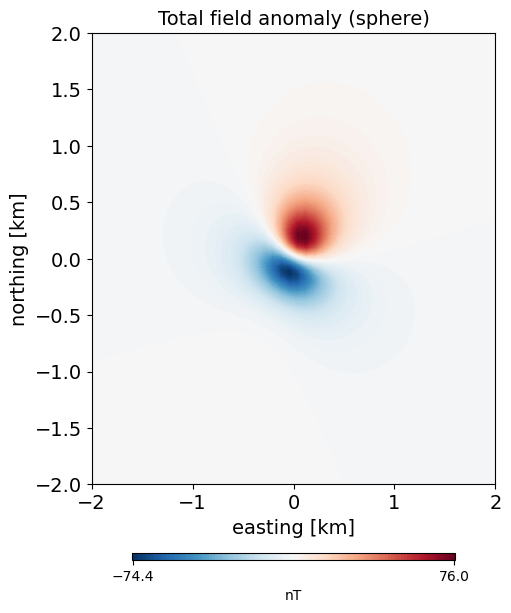

In [16]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(5,6), layout='constrained')

plt.title('Total field anomaly (sphere)', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.contourf(1e-3*yc,1e-3*xc,tfa_sph,100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[tfa_sph.min(), tfa_sph.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/TFA_sphere'
plt.savefig(file_name+'.png',dpi=200)
plt.show()

## Efeito magnético de um prisma

### Gerando os parâmetros do prisma

In [17]:
intensidades = np.array([50.])

In [18]:
I,D = -20.,50.
direcoes = np.array([[I,D]])

In [19]:
modelo = np.array([[-50.,50.,-800.,800.,100.,250.]])

### Cálculo das componentes do campo magnético

In [20]:
bz = prism_mag.magnetics(coordinates,modelo,intensidades,direcoes,field="b_z").reshape(shape)

In [21]:
bx = prism_mag.magnetics(coordinates,modelo,intensidades,direcoes,field="b_x").reshape(shape)

In [22]:
by = prism_mag.magnetics(coordinates,modelo,intensidades,direcoes,field="b_y").reshape(shape)

### Anomalia de campo total aproximada

In [23]:
I0,D0 = -40.,30.
j0x = np.cos(np.deg2rad(I0))*np.cos(np.deg2rad(D0))
j0y = np.cos(np.deg2rad(I0))*np.sin(np.deg2rad(D0))
j0z = np.sin(np.deg2rad(I0))
tfa_pr = j0x*bx + j0y*by + j0z*bz

### Visualização dos dados calculados 

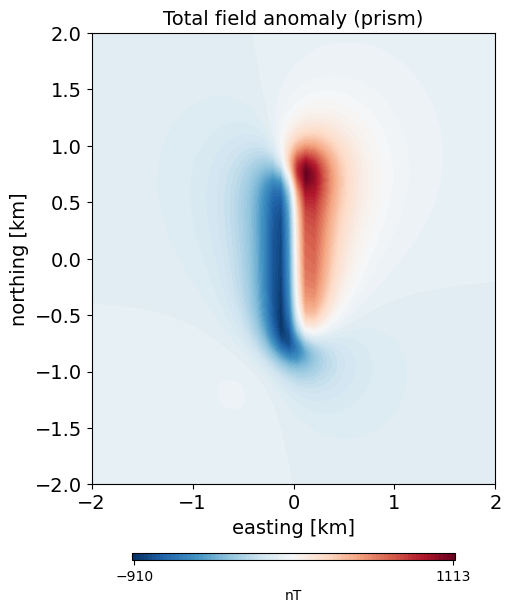

In [24]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(5,6), layout='constrained')

plt.title('Total field anomaly (prism)', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.contourf(1e-3*yc,1e-3*xc,tfa_pr,100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[tfa_pr.min(), tfa_pr.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/TFA_prism'
plt.savefig(file_name+'.png',dpi=200)
plt.show()